In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import gaussian_kde

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [3]:
sns.set_style('ticks')
font = {"family": "Arial", 
      "size": 16, 
      "weight": "normal"}

plt.rc("font", **font)

In [4]:
def FechKal(x,y): 
    da2 = []
    y = y
    x_cumulative = np.cumsum(x)
    time_c = np.cumsum(y)
    x_cumulative_with_zero = np.insert(x_cumulative,
                                       0, 0)

    f_x = x_cumulative/x_cumulative.max()
    
    deltat = time_c[1:-1] - time_c[0:-2]
    
    da2_a = np.zeros([len(x)])
    da2_a[0] = (((f_x[0]**2 - 0**2))*np.pi)/(36*(deltat[0]))
    
    da2_a = ((f_x[1:-1]**2 - f_x[0:-2]**2)*np.pi)/(36*deltat)

    da2_b = np.zeros([len(x)])
    dif_f = f_x[1:-1] - f_x[0:-2]
    da2_b = (1/((np.pi**2)*deltat))*(-(np.pi*np.pi/3)*dif_f -
                                             (2*np.pi)*(np.sqrt(1 -(np.pi/3)*f_x[1:-1]) - np.sqrt(1 - (np.pi/3)*f_x[0:-2])))
    
    da2_c = np.zeros([len(x)])
    da2_c = (1/(np.pi*np.pi*deltat))*\
    np.log((1 - f_x[0:-2])/(1 - f_x[1:-1]))
    
    
    ka = f_x[(f_x <= 0.1) & (f_x > 0)]
    kb = f_x[(f_x > 0.1) & (f_x <= 0.9)]
    kc = f_x[(f_x > 0.9) & (f_x <= 1)]
    
    na = len(ka)
    nb = len(kb)
    nc = len(kc)
    
    a = da2_a[:na]
    b = da2_b[na:(nb + na)]
    c = da2_c[-nc:]
    da2.extend(a)
    da2.extend(b)
    da2.extend(c)
    
    return da2

# Read in all Data 

In [10]:
import os 
import pandas as pd
cwd  = os.chdir('/Users/jackcarter/Documents/Data_Mixtures')
# hb-d1 + acs
df1 = pd.read_csv("mix_hb_acs.csv", engine = 'python')
# acs + tcr
df2 = pd.read_csv('mix_tcr_acs.csv', engine = 'python')
# hb-d1 + tcr
df3 = pd.read_csv('mix_hb_tcr.csv', engine = 'python')
# hb-d1 + tcr + acs
df4 = pd.read_csv('mix_tcr_acs.csv', 
                 engine = 'python')

In [16]:
ar39_1 = df1['39Ar'].values
ar39_2 = df2['39Ar'].values
ar39_3 = df3['39Ar'].values
ar39_4 = df4['39Ar'].values

In [17]:
time1 = 300 * np.ones(len(ar39_1))
time2 = 300 * np.ones(len(ar39_2))
time3 = 300 * np.ones(len(ar39_3))
time4 = 300 * np.ones(len(ar39_4))

In [18]:
x1 = FechKal(ar39_1, time1)
x2 = FechKal(ar39_2, time2)
x3 = FechKal(ar39_3, time3)
x4 = FechKal(ar39_4, time4)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


In [19]:
arr1 = np.log(x1)
arr2 = np.log(x2)
arr3 = np.log(x3)
arr4 = np.log(x4)

In [25]:
temp1 = df1['Temperature (Degrees Celcius)'].values
temp2 = df2['Temperature (Degrees Celcius)'].values
temp3 = df3['Temperature (Degrees Celcius)'].values
temp4 = df4['Temperature (Degrees Celcius)'].values

In [26]:
tplot1 = 10000/(temp1 + 273.15)
tplot2 = 10000/(temp2 + 273.15)
tplot3 = 10000/(temp3 + 273.15)
tplot4 = 10000/(temp4 + 273.15)

[Text(0, 1, '700'), Text(0, 1, '800'), Text(0, 1, '1000'), Text(0, 1, '1400')]

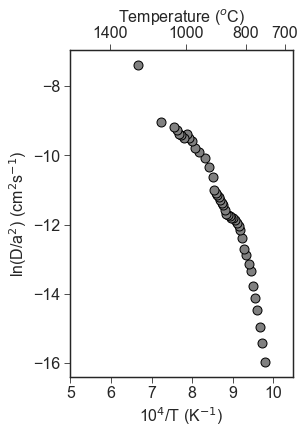

In [37]:
# HB + ACS
fig, ax = plt.subplots(figsize = (4, 6))
ax.plot(tplot1, arr1, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax.twiny()

Tdc = np.array([700, 800, 1000 , 1400])
Tp = 10e3/(Tdc + 273.15)
labels = list(['700', '800', '1000',   
              '1400'])
ax2.plot(tplot1, arr1, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax.set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

[Text(0, 1, '600'), Text(0, 1, '800'), Text(0, 1, '1000'), Text(0, 1, '1400')]

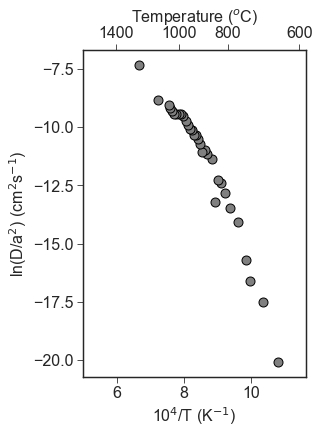

In [38]:
# ACS + TCR
fig, ax = plt.subplots(figsize = (4, 6))
ax.plot(tplot2, arr2, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax.twiny()

Tdc = np.array([600, 800, 1000 , 1400])
Tp = 10e3/(Tdc + 273.15)
labels = list(['600', '800', '1000',   
              '1400'])
ax2.plot(tplot2, arr2, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax.set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

[Text(0, 1, '600'), Text(0, 1, '800'), Text(0, 1, '1000'), Text(0, 1, '1400')]

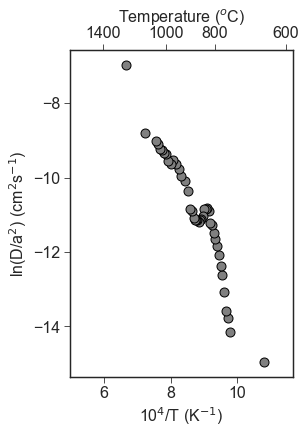

In [39]:
# HB-D1 +  TCR
fig, ax = plt.subplots(figsize = (4, 6))
ax.plot(tplot3, arr3, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax.twiny()

Tdc = np.array([600, 800, 1000 , 1400])
Tp = 10e3/(Tdc + 273.15)
labels = list(['600', '800', '1000',   
              '1400'])
ax2.plot(tplot3, arr3, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax.set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

[Text(0, 1, '600'), Text(0, 1, '800'), Text(0, 1, '1000'), Text(0, 1, '1400')]

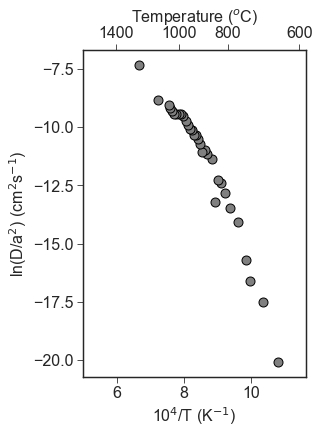

In [41]:
# HB-D1 +  TCR + ACS
fig, ax = plt.subplots(figsize = (4, 6))
ax.plot(tplot4, arr4, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax.twiny()

Tdc = np.array([600, 800, 1000 , 1400])
Tp = 10e3/(Tdc + 273.15)
labels = list(['600', '800', '1000',   
              '1400'])
ax2.plot(tplot4, arr4, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax.set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

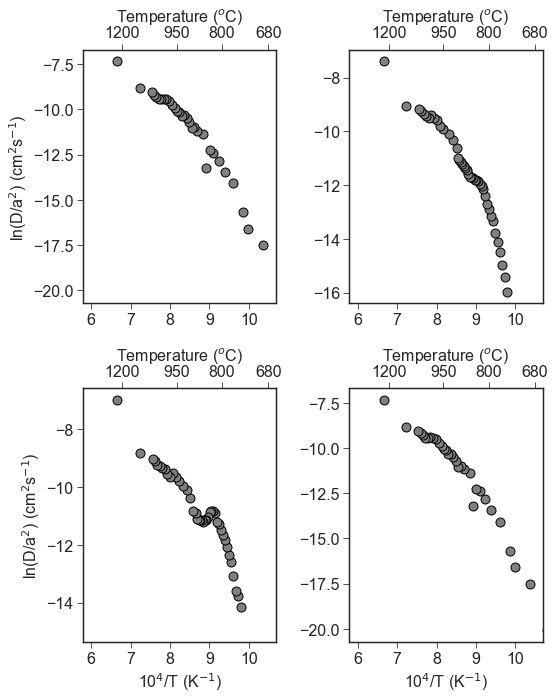

In [53]:
fig, ax = plt.subplots(2, 2, figsize = (8, 10))
# ACS + TCR
ax[0,0].plot(tplot2, arr2, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax[0,0].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax[0,0].locator_params(axis='y', nbins=6)
ax[0,0].locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax[0,0].twiny()

Tdc = np.array([680, 800, 950 , 1200])
Tp = 10e3/(Tdc + 273.15)
labels = list(['680', '800', '950',   
              '1200'])
ax2.plot(tplot2, arr2, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[0,0].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

# HB + ACS
ax[0,1].plot(tplot1, arr1, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')


ax[0,1].locator_params(axis='y', nbins=6)
ax[0,1].locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax[0,1].twiny()
ax2.plot(tplot1, arr1, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[0,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


# HB-D1 +  TCR
ax[1,0].plot(tplot3, arr3, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax[1,0].set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax[1,0].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax[1,0].locator_params(axis='y', nbins=6)
ax[1,0].locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax[1,0].twiny()



ax2.plot(tplot3, arr3, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[1,0].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


# HB-D1 +  TCR + ACS
ax[1,1].plot(tplot4, arr4, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')

ax[1,1].set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax[1,1].locator_params(axis='y', nbins=6)
ax[1,1].locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax[1,1].twiny()
ax2.plot(tplot4, arr4, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax[1,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

plt.tight_layout()
plt.savefig('Arrhenis_supplement_vandm.pdf')

# Figure 2 in Paper

In [79]:
golden_r = 1.61803399
sns.set_style('ticks')
font = {"family": "Arial", 
      "size": 14, 
      "weight": "normal"}

plt.rc("font", **font)

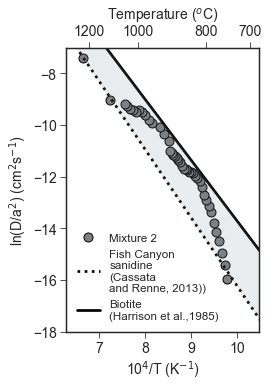

In [83]:
T = np.linspace(700, 10000, 20)
tplots = 1e4/(T)
R = 8.314e-3
def arr(ea, d0):
    y = d0*np.exp(-ea/(R*T))
    return y 

d_acs = arr(220, 0.112)
d_hb = arr(196, 0.077)
log_ac = np.log(d_acs/(0.002**2))
log_hb = np.log(d_hb/(0.002**2))

# HB + ACS
fig, ax = plt.subplots(figsize = (4, 4 + golden_r))
ax.plot(tplot1, arr1, 
          'o', markerfacecolor = 'grey', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Mixture 2')

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)

#### Temp #####

ax2 = ax.twiny()

Tdc = np.array([700, 800, 1000 , 1200])
Tp = 10e3/(Tdc + 273.15)
labels = list(['700', '800', '1000',   
              '1200'])
ax2.plot(tplot1, arr1, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')
ax.set_xlim(Tp.min() -0.5, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -0.5, Tp.max()+ 0.2)

ax2.set_xlabel('Temperature ($^{o}$C)')
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

plt.fill_between(tplots, log_ac, log_hb, 
                 color = 'lightslategray', alpha =0.15)

ax.plot(tplots, log_ac,':k', lw = 2.7, label = 'Fish Canyon\nsanidine\n(Cassata\nand Renne, 2013))')
ax.plot(tplots, log_hb,'-k', lw = 2.7, label = 'Biotite\n(Harrison et al.,1985)')
ax.set_ylim(-18, -7)

ax.legend(loc = 'best', fontsize = 'small')
plt.tight_layout()
plt.savefig('Arrhenius_test_plot_fig2.pdf')